In [1]:
import sys
print(sys.executable)

c:\Users\Beeclick\Documents\MIAAD\S3\Data Mining\Project\data-mining-project\DataMiningEnv\Scripts\python.exe


### Import des bibliothèques

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Chargement des données brutes

In [3]:
catalogue = pd.read_csv("../data/raw/Catalogue.csv")

### Nettoyage des données

In [4]:
# Affichage des premières lignes
print("Aperçu des données brutes:")
catalogue.head()

Aperçu des données brutes:


,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350


In [5]:
# Vérification des types de données 
print("\nInformations sur les données:")
catalogue.info()


Informations sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   marque     270 non-null    object
 1   nom        270 non-null    object
 2   puissance  270 non-null    int64 
 3   longueur   270 non-null    object
 4   nbPlaces   270 non-null    int64 
 5   nbPortes   270 non-null    int64 
 6   couleur    270 non-null    object
 7   occasion   270 non-null    bool  
 8   prix       270 non-null    int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 17.3+ KB


In [6]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
catalogue.isnull().sum()


Valeurs manquantes par colonne:


marque       0
nom          0
puissance    0
longueur     0
nbPlaces     0
nbPortes     0
couleur      0
occasion     0
prix         0
dtype: int64

In [7]:
# Compter les occurrences pour chaque colonne de type 'object'
for col in catalogue.columns:
    if catalogue[col].dtype == 'object':
        print(catalogue[col].value_counts())
        print()

marque
Volkswagen    40
Renault       40
BMW           20
Mercedes      20
Audi          20
Nissan        15
Jaguar        10
Saab          10
Volvo         10
Fiat          10
Lancia        10
Mini          10
Peugeot       10
Ford          10
Skoda          5
Seat           5
Kia            5
Hyundaï        5
Honda          5
Dacia          5
Daihatsu       5
Name: count, dtype: int64

nom
S80 T6              10
Touran 2.0 FSI      10
Polo 1.2 6V         10
New Beatle 1.8      10
Golf 2.0 FSI        10
9.3 1.8T            10
Megane 2.0 16V      10
Vel Satis 3.5 V6    10
1007 1.4            10
Espace 2.0T         10
Laguna 2.0T         10
X-Type 2.5 V6       10
Ypsilon 1.4 16V     10
A200                10
S500                10
Copper 1.6 16V      10
A3 2.0 FSI          10
A2 1.4              10
M5                  10
Mondeo 1.8          10
Croma 2.2           10
120i                10
Superb 2.8 V6        5
Toledo 1.6           5
Almera 1.8           5
Maxima 3.0 V6        5
Primera

In [8]:
# Recherche des doublons
duplicates = catalogue.duplicated().sum()
print(f"\nNombre de doublons : {duplicates}")


Nombre de doublons : 0


In [9]:
# Suppression des doublons
# df = df.drop_duplicates()

In [10]:
catalogue.describe(include='object')

,marque,nom,longueur,couleur
count,270,270,270,270
unique,21,32,4,5
top,Volkswagen,S80 T6,longue,blanc
freq,40,10,90,54


In [11]:
catalogue.describe(include='boolean')

,occasion
count,270
unique,2
top,False
freq,160


In [12]:
catalogue.describe()

,puissance,nbPlaces,nbPortes,prix
count,270.000000,270.000000,270.000000,270.000000
mean,157.592593,5.222222,4.814815,26668.055556
std,90.551289,0.629707,0.580798,19050.121112
min,55.000000,5.000000,3.000000,7500.000000
25%,109.000000,5.000000,5.000000,16029.000000
50%,147.000000,5.000000,5.000000,20597.500000
75%,170.000000,5.000000,5.000000,30000.000000
max,507.000000,7.000000,5.000000,101300.000000


### Visualisation des données

In [22]:
catalogue.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350


C:\Users\Beeclick\AppData\Local\Temp\ipykernel_41724\2788385060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marque', y='puissance', data=catalogue,palette="viridis")


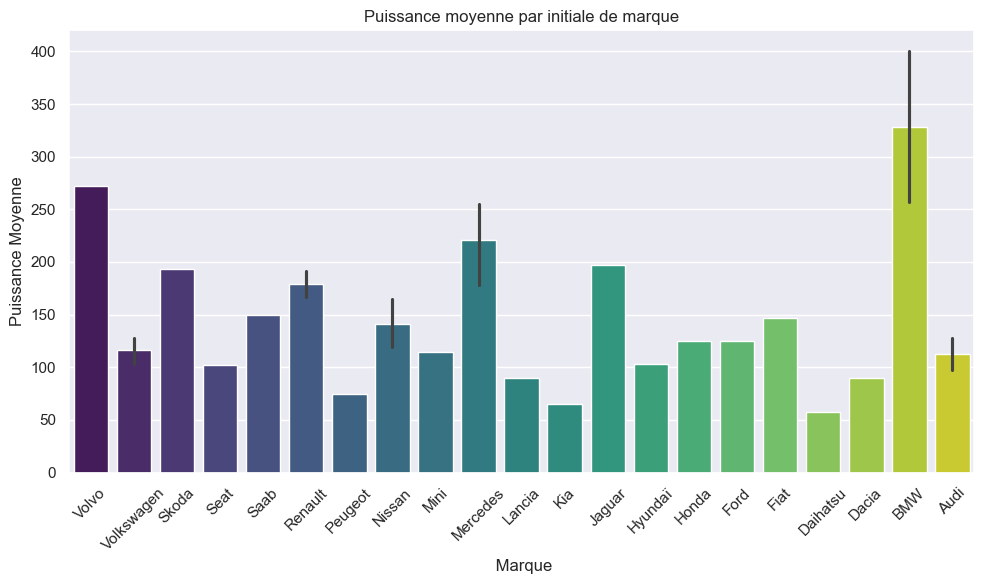

In [13]:
# Analyse des variables catégoriques
if 'marque' in catalogue.columns and 'puissance' in catalogue.columns:
    # Plot the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='marque', y='puissance', data=catalogue,palette="viridis")
    plt.title('Puissance moyenne par initiale de marque')
    plt.xlabel(' Marque')
    plt.ylabel('Puissance Moyenne')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Beeclick\AppData\Local\Temp\ipykernel_41724\4218249458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nom', y='puissance', data=catalogue,palette="viridis")


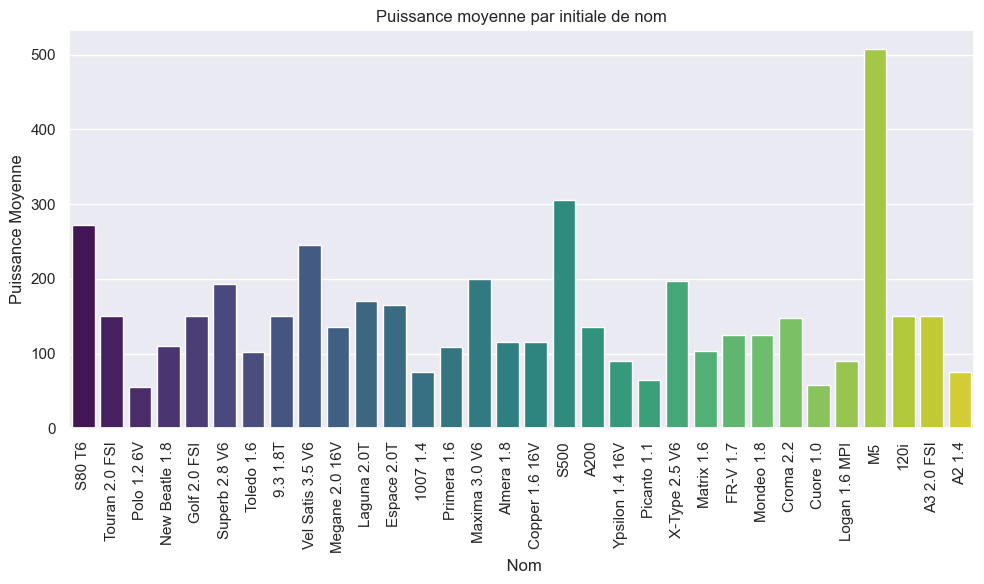

In [14]:
# Analyse des variables catégoriques
if 'nom' in catalogue.columns and 'puissance' in catalogue.columns:
    # Plot the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='nom', y='puissance', data=catalogue,palette="viridis")
    plt.title('Puissance moyenne par initiale de nom')
    plt.xlabel(' Nom')
    plt.ylabel('Puissance Moyenne')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

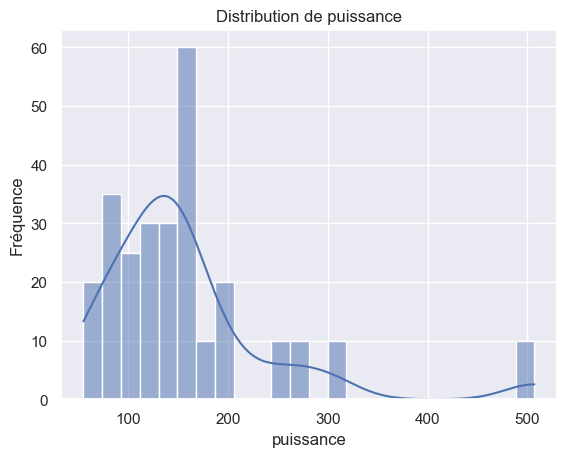

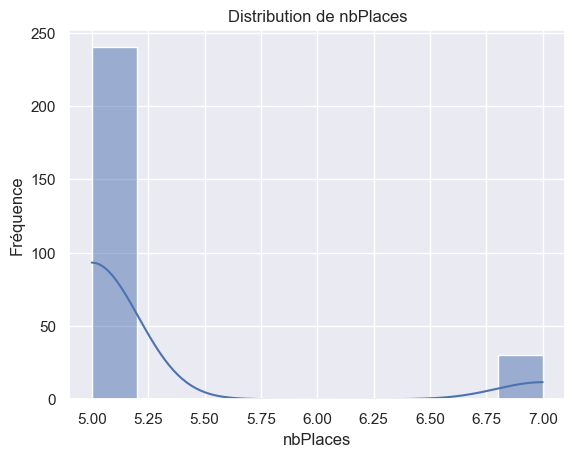

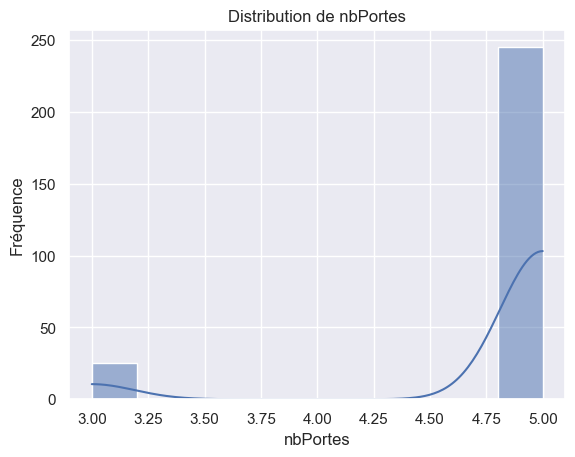

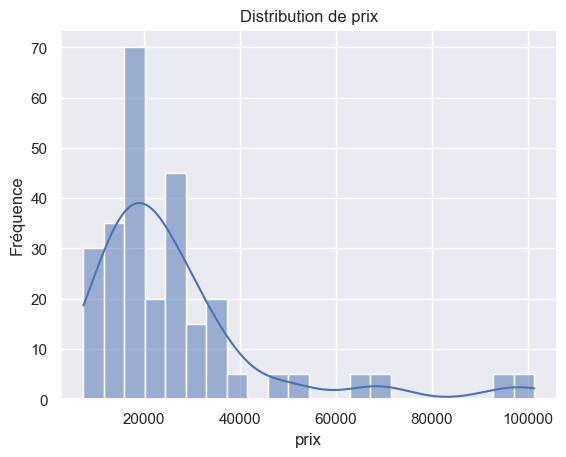

In [15]:
# Histogrammes pour les variables numériques
num_cols = catalogue.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(catalogue[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

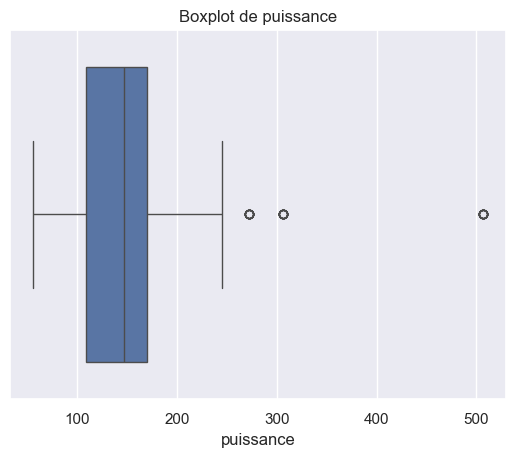

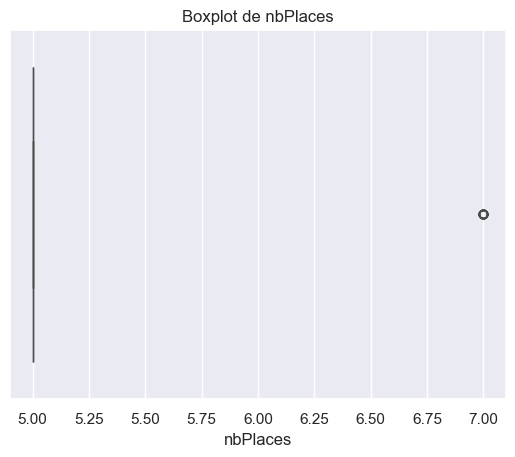

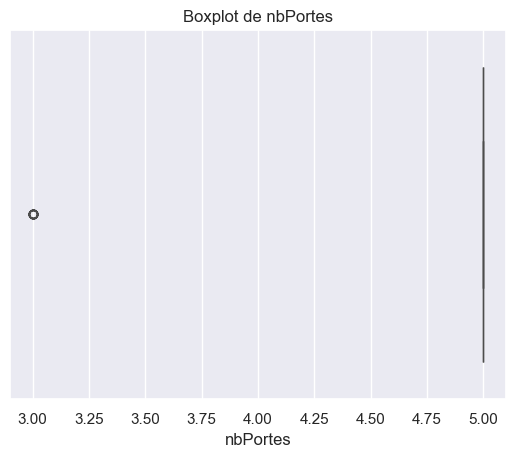

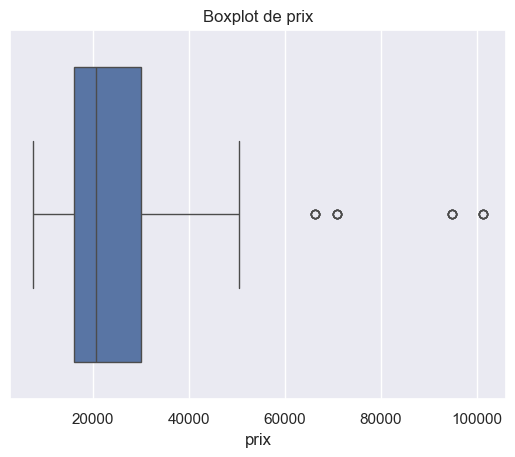

In [16]:
# Boxplots pour détecter les outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=catalogue[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [23]:
from sklearn.preprocessing import OrdinalEncoder

# Définir l'ordre des catégories
ordre_longueur = ['courte', 'moyenne', 'longue', 'très longue']

# Initialiser le OrdinalEncoder avec l'ordre spécifié
encoder = OrdinalEncoder(categories=[ordre_longueur])

# Appliquer l'encodage ordinal à la colonne 'longueur'
catalogue['longueur'] = encoder.fit_transform(catalogue[['longueur']])

# Vérifier les résultats
print(catalogue[['longueur']].head())


   longueur
0       3.0
1       3.0
2       3.0
3       3.0
4       3.0


In [25]:
# Séparer les voitures neuves et d'occasion
catalogue_new      = catalogue[catalogue["occasion"] == False]
catalogue_occasion = catalogue[catalogue["occasion"] == True]

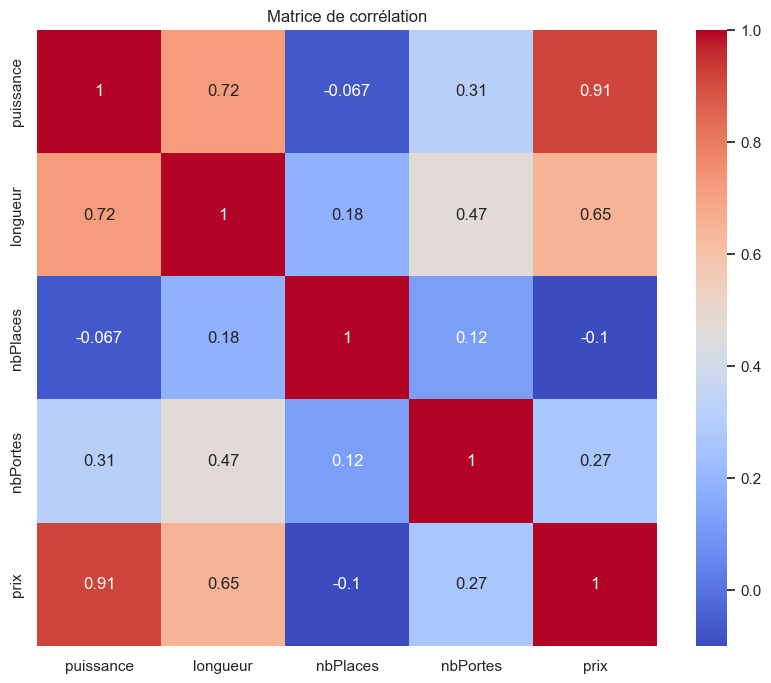

In [27]:
num_cols = catalogue.select_dtypes(include=['float', 'int']).columns
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(catalogue_new[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

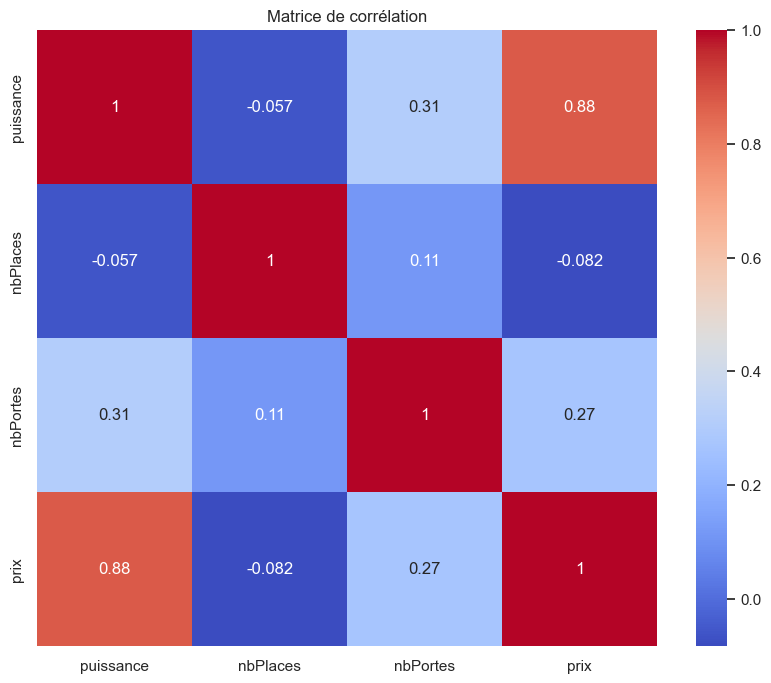

In [24]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(catalogue[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [18]:
# J'utilise le dataframe catalogue
catalogue.to_csv('../data/processed/catalogue_processed.csv', index=False)
print("\nDonnées nettoyées sauvegardées dans 'catalogue_processed.csv'")


Données nettoyées sauvegardées dans 'catalogue_processed.csv'


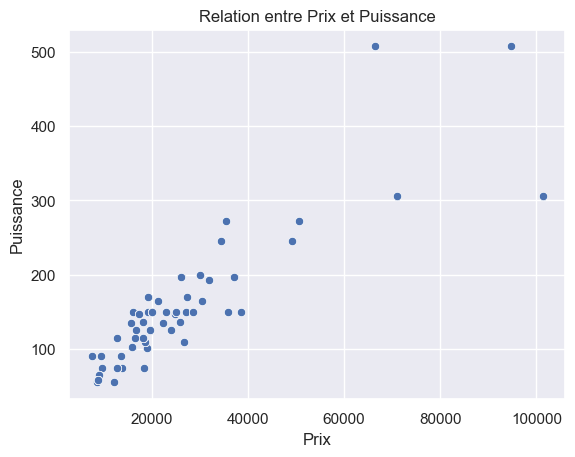

In [19]:
# Nuages de points pour explorer les relations entre les variables
if 'prix' in catalogue.columns and 'puissance' in catalogue.columns:
    plt.figure()
    sns.scatterplot(x=catalogue['prix'], y=catalogue['puissance'])
    plt.title('Relation entre Prix et Puissance')
    plt.xlabel('Prix')
    plt.ylabel('Puissance')
    plt.show()

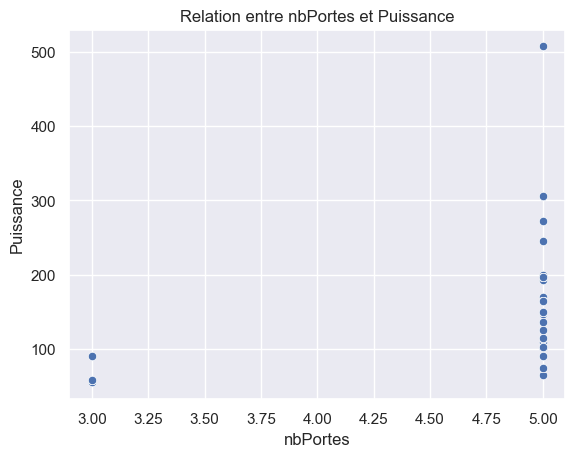

In [20]:
# Nuages de points pour explorer les relations entre les variables
if 'nbPortes' in catalogue.columns and 'puissance' in catalogue.columns:
    plt.figure()
    sns.scatterplot(x=catalogue['nbPortes'], y=catalogue['puissance'])
    plt.title('Relation entre nbPortes et Puissance')
    plt.xlabel('nbPortes')
    plt.ylabel('Puissance')
    plt.show()

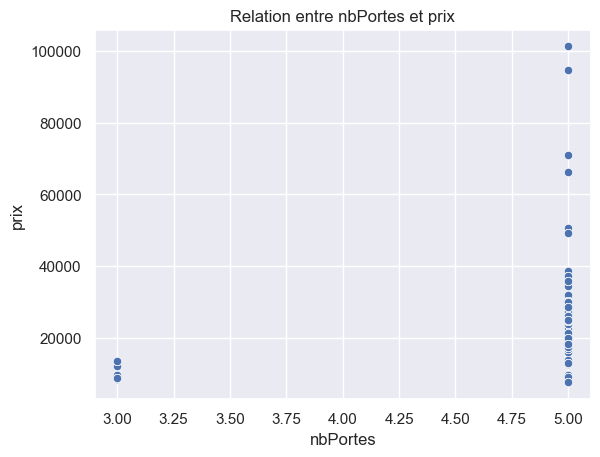

In [21]:
# Nuages de points pour explorer les relations entre les variables
if 'nbPortes' in catalogue.columns and 'prix' in catalogue.columns:
    plt.figure()
    sns.scatterplot(x=catalogue['nbPortes'], y=catalogue['prix'])
    plt.title('Relation entre nbPortes et prix')
    plt.xlabel('nbPortes')
    plt.ylabel('prix')
    plt.show()